# 01_BOW_Template_Model

Reverse engineering the ManOwaR LyGen
<br>GitHub repo: https://github.com/doug2k1/manowar-lyrics-generator
<br>Front-end: https://www.powermetalsong.com/
<br>Coverage: https://toiletovhell.com/discover-the-secret-of-steel-with-this-manowar-lyric-generator/

<img src="ManOwaR lyrics generator.jpg">

### Load dependencies:

In [1]:
import pandas as pd
import numpy as np
import random

# View warnings once (or ignore)
import warnings
warnings.filterwarnings(action='once')
#warnings.filterwarnings('ignore')

# Show multiple results per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Define parameters

In [2]:
# Define parameters
# Replicating: https://github.com/doug2k1/manowar-lyrics-generator/blob/master/src/terms.js
nouns = ["battle","blood","death","enemies","fire","glory","hammer","honor","horse","kings","master","metal","power","steel","sword","warrior","wind"]
verbs = ["attack", "behold", "burn", "feel", "fight", "hail", "kill", "ride"]
adjectives = ["bloody","brave","dead","fierce","heavy","loud","magic","mighty","proud","screaming","strong","victorious"]
subjects = ["I", "we", "they", "brothers", "the gods"]
adverbs = ["the", "all the", "my", "our", "their", "your", ""]
connectors = ["and", "and the", "with", "without", "against the"]
title_builder = False

### Define functions

In [3]:
# Verse Builder
# Replicating: https://github.com/doug2k1/manowar-lyrics-generator/blob/master/src/songBuilder.js
def verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors):
    verse = []
    
    if  random.randint(0, 3) is 0:
        verse.append(random.choice(subjects))
        
    verse.append(random.choice(verbs))
    verse.append(random.choice(adverbs))
    
    if  random.randint(0, 2) is 0:
        verse.append(random.choice(adjectives))
        
    verse.append(random.choice(nouns))
    
    if  random.randint(0, 2) is 0:
        verse.append(random.choice(connectors))
        
        if  random.randint(0, 3) is 3:
            verse.append(random.choice(adjectives))
            
        verse.append(random.choice(nouns))
    
    if  random.randint(0, 4) is 0 and title_builder != True:
        verse.append(random.choice(connectors))

        if random.randint(0, 3) is 3:
            verse.append(random.choice(adjectives))

        verse.append(random.choice(nouns))
    
    # List to sentence
    verse = ' '.join(word for word in verse)
    
    # Convert to string
    str(verse)
    
    # Return capitalized line
    return verse.capitalize()

In [4]:
# Line test
title_builder = False
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)

'Hail  horse against the power'

In [5]:
# Title test
title_builder = True
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)

'Feel  blood'

### Build Lyric Generator

In [6]:
# Insert title
title_builder = True
title = verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
print('Track title: ' + title)
print('')

# Insert 1st Verse
title_builder = False
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
print('')

# Insert Chorus
title
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
title
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
print('')

# Insert 2nd Verse
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
print('')

# Insert Outro:
title
title
title
title

Track title: Hail your metal



'Hail the metal'

'The gods fight our brave kings'

'Attack your bloody glory against the enemies'

'Behold their wind and honor'

'We ride their honor with sword'

'They ride my horse'

'Hail your metal'

'Feel my brave battle and death'

'Hail your metal'

'Feel my mighty enemies'

'Fight all the heavy honor against the horse with mighty master'

'Ride our brave glory'

'I attack your battle without steel'

'Ride their proud metal'

'Hail your metal'

'Hail your metal'

'Hail your metal'

'Hail your metal'

### Link to full Manowar archive

In [7]:
# Load dependencies:
import pandas as pd
import numpy as np
import os
import re
import regex
import string

# View warnings once (or ignore)
import warnings
warnings.filterwarnings(action='once')
#warnings.filterwarnings('ignore')

# Show multiple results per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# See wider columns (for text)
pd.set_option('max_colwidth', 500)

In [8]:
# Load lyric directory pre-downloaded with LyricsGenius package:
files = pd.DataFrame(os.listdir("#your_directory/Manowar/"), columns = ["json_file_name"])
# Exclude non json files:
files = files[files['json_file_name'].str.contains(".json")]
# Quick preview:
files.head()

,json_file_name
2,lyrics_manowar_achillesagonyandecstasyineightparts.json
3,lyrics_manowar_allmenplayon10.json
4,lyrics_manowar_allmenplayonten.json
5,lyrics_manowar_anamericantrilogy.json
6,lyrics_manowar_animals.json


In [9]:
# Create empty archive:
archive = pd.DataFrame([])
# Loop through json files in directory and append to archive:
for i in range(0, len(files)):
    # Load raw json file:
    raw_json = pd.read_json("#your_directory/Manowar/"+files['json_file_name'].iloc[i])
    # Load json dictionary as df:
    lyrics = pd.DataFrame(raw_json['songs'][0], index = [0])
    # Add artist:
    lyrics['artist'] = raw_json['artist'][0]
    # Drop undesired columns:
    lyrics = lyrics.drop(['image', 'year'], axis=1)
    # Append to archive:
    archive = archive.append(lyrics)
    # Reset index:
    archive = archive.reset_index()
    archive = archive.drop(['index'], axis=1)

In [10]:
# Quick preview:
archive.head()

,album,lyrics,title,artist
0,The Triumph Of Steel,"(Prelude)\n\nI HECTOR STORMS THE WALL\nSee my chariot, run to your ships\nI'll drive you back to the sea\nYou came here for gold, the wall will not hold\nThis day was promised to me\nThe Gods are my shield, my fate has been sealed\nLightning and javelins fly\nSoon many will fall, we are storming the wall\nStones fall like snow from the sky\n\nWe will pay with our glory in the fire of battle\nZeus, today is mine\nKilling all in my way like sheep and like cattle\nSmashing skulls of all who def...","Achilles, Agony And Ecstasy In Eight Parts",Manowar
1,Sign of the Hammer,"I made a rock'n'roll sin\nWhen I tried givin' in to\nMake money had to turn down low\nThey said, ""Why be proud, don't play so loud\nBe like us and get a sound that's real thin\nWear a polyester suit, act happy look cute\nGet a haircut and buy small gear""\nThat's when I turned to them and said\n""Hold it, right there!""\n\nWell it's more to me than just a job\nAnd while I'm playin' you won't get robbed\nNobody tells a man how to play\nIt just ain't that way hey, hey, hey\nCan you hear me say......",All Men Play On 10,Manowar
2,Sign of the Hammer,"I made a rock n' roll sin, when I tried giving in\nTo make money had to turn down low\nThey said, ""why be proud, don't play so loud, be like us\nAnd get A sound that's real thin\nWear A polyester suit, act happy, look cute, get A haircut\nAnd buy small gear""\nThat's when I turned to them and said, hold it, right there\nWell it's more to me than just A job, and while I'm playin'\nYou won't get robbed\nNobody tells A man how to play, it just ain't that way\nHey, hey, hey, can you hear me say\n...",All Men Play On Ten,Manowar
3,Warriors of the World,"Oh, I wish, I was in the land of cotton\nOld times they are not forgotten\nLook away, look away, look away Dixie land\n\nOh, I wish, I was in Dixie away, away\nIn Dixie land I'll take my stand\nTo live and die in Dixie\n\nDixie land where I was born\nEarly Lord, one frosty morning\nLook away, look away, look away Dixie land\n\nGlory, glory, Hallelujah\nGlory, glory, Hallelujah\nGlory, glory, Hallelujah\nThis truth is marching on\n\nSo hush little baby, don't you cry\nYou know your daddy's bo...",An American Trilogy,Manowar
4,Sign of the Hammer,"Hear the call of the wild in us all\nIt waits for the night to fall\nI'm getting hot, I'm ready for the night\nNo holdin' back, let's ball\nI'm gonna give all you can take all night\nAnd leave you in the morning feeling right\n\nI'm an animal, there's an animal in me\nGonna set it free\nI'm an animal, there's an animal in me\nGonna set it free\n\nI've been looking, you've been watching the side\nThere's somethings you just can't hide\nOh, your getting wet, your working up a sweat\nYour hairs...",Animals,Manowar


In [11]:
# ManoWaR specific pre-processing:
# The track entitled "Father" has been recorded in multiple languages. The non-english versions below need to be removed:
archive[archive['title'].str.contains("Father -")]['title']

6        Apa (Father - Hungarian Version)
13        Baba (Father - Turkish Version)
40       Far (Father - Norwegian Version)
65         Isä (Father - Finnish Version)
85     Mon Père (Father - French Version)
92       Ojciec (Father - Polish Version)
94       Otac (Father - Croatian Version)
98       Padre (Father - Italian Version)
99       Padre (Father - Spanish Version)
100     Pai (Father - Portuguese Version)
115    Tatko (Father - Bulgarian Version)
116      Tată (Father - Romanian Version)
151       Vater (Father - German Version)
158       Πατερα (Father - Greek Version)
159         父 (Father - Japanese Version)
Name: title, dtype: object

In [12]:
# Determine indeces for non-english Father tracks (which standardised as "Father  - * version"):
father = archive[archive['title'].str.contains("Father -")].index.tolist()
# See Father index:
father
# Exclude Father index:
archive = archive.drop(father, axis=0)

[6, 13, 40, 65, 85, 92, 94, 98, 99, 100, 115, 116, 151, 158, 159]

In [13]:
# Check for additional pre-processing requirements:
archive

,album,lyrics,title,artist
0,The Triumph Of Steel,"(Prelude)\n\nI HECTOR STORMS THE WALL\nSee my chariot, run to your ships\nI'll drive you back to the sea\nYou came here for gold, the wall will not hold\nThis day was promised to me\nThe Gods are my shield, my fate has been sealed\nLightning and javelins fly\nSoon many will fall, we are storming the wall\nStones fall like snow from the sky\n\nWe will pay with our glory in the fire of battle\nZeus, today is mine\nKilling all in my way like sheep and like cattle\nSmashing skulls of all who def...","Achilles, Agony And Ecstasy In Eight Parts",Manowar
1,Sign of the Hammer,"I made a rock'n'roll sin\nWhen I tried givin' in to\nMake money had to turn down low\nThey said, ""Why be proud, don't play so loud\nBe like us and get a sound that's real thin\nWear a polyester suit, act happy look cute\nGet a haircut and buy small gear""\nThat's when I turned to them and said\n""Hold it, right there!""\n\nWell it's more to me than just a job\nAnd while I'm playin' you won't get robbed\nNobody tells a man how to play\nIt just ain't that way hey, hey, hey\nCan you hear me say......",All Men Play On 10,Manowar
2,Sign of the Hammer,"I made a rock n' roll sin, when I tried giving in\nTo make money had to turn down low\nThey said, ""why be proud, don't play so loud, be like us\nAnd get A sound that's real thin\nWear A polyester suit, act happy, look cute, get A haircut\nAnd buy small gear""\nThat's when I turned to them and said, hold it, right there\nWell it's more to me than just A job, and while I'm playin'\nYou won't get robbed\nNobody tells A man how to play, it just ain't that way\nHey, hey, hey, can you hear me say\n...",All Men Play On Ten,Manowar
3,Warriors of the World,"Oh, I wish, I was in the land of cotton\nOld times they are not forgotten\nLook away, look away, look away Dixie land\n\nOh, I wish, I was in Dixie away, away\nIn Dixie land I'll take my stand\nTo live and die in Dixie\n\nDixie land where I was born\nEarly Lord, one frosty morning\nLook away, look away, look away Dixie land\n\nGlory, glory, Hallelujah\nGlory, glory, Hallelujah\nGlory, glory, Hallelujah\nThis truth is marching on\n\nSo hush little baby, don't you cry\nYou know your daddy's bo...",An American Trilogy,Manowar
4,Sign of the Hammer,"Hear the call of the wild in us all\nIt waits for the night to fall\nI'm getting hot, I'm ready for the night\nNo holdin' back, let's ball\nI'm gonna give all you can take all night\nAnd leave you in the morning feeling right\n\nI'm an animal, there's an animal in me\nGonna set it free\nI'm an animal, there's an animal in me\nGonna set it free\n\nI've been looking, you've been watching the side\nThere's somethings you just can't hide\nOh, your getting wet, your working up a sweat\nYour hairs...",Animals,Manowar
5,The Lord of Steel,Another lie\nTime to die\nAnother day\nBlown away\n\nAnother scam\nShow you who I am\nAnother day\nBlown away\n\nHand of justice\nSoon will be falling\nVengeance thine\nLord of steel\nAnnihilation\n\nThey will never win this fight\nWe have the power and the might\nWe have the sacred right\nFeel the power here tonight\n\nHand of justice\nSoon will be falling\nVengeance thine\nLord of steel\nAnnihilation\n\nLive the life we truly feel\nFighting for the lord of steel\nHeavy metal is my life\nHe...,Annihilation,Manowar
7,None,Battle hymns did sound the call\nYou came to our side\nYou heard true metal-into glory\nRide\n\nYou stood beside us the false ones\nCried.-Your love is judgment\nYou gave us life\n\nYou wait in the rain-you walk\nThrough the snow.We give you\nOur blood.We want you to know\nIn our eyes you immortal-\nIn our hearts you'll live forever-\nIn our eyes you immortal-\nIn our hearts you'll live forever\n\nWe have read your letters-\nWe have heard your call\nWe were brought together-\nCause we've got...,Army Of Immortals,Manowar
8,None,Raise thy weapons on this day\nYe shall not die alone\nFight and die let Valkyries fly\nFor they shall take thee h

In [14]:
# Some tracks are instrumental with lyrics entered as: [Instrumental]
# (normally the LyricsGenius package picks this up but apaprently it's not fail-safe)
archive[archive['lyrics']==("[Instrumental]")]

,album,lyrics,title,artist
36,Fighting the World,[Instrumental],Drums Of Doom,Manowar
80,The Final Battle I (EP),[Instrumental],March of the Heroes into Valhalla,Manowar
87,Louder than Hell,[Instrumental],My Spirit Lives On,Manowar
96,Gods of War,[Instrumental],Overture To Odin,Manowar
97,Gods of War,[Instrumental],Overture To The Hymn Of The Immortal Warriors,Manowar
112,Kings of Metal,[Instrumental],Sting of the Bumblebee,Manowar
130,Kings of Metal MMXIV,[Instrumental],The Heart of Steel MMXIV (Orchestral Intro Version),Manowar
133,Warriors of the World,[Instrumental],The March,Manowar
139,Kings of Metal MMXIV,[Instrumental],The Sting of the Bumblebee MMXIV,Manowar
144,Sign of the Hammer,[Instrumental],Thunderpick,Manowar


In [15]:
# Remove instrumental tracks:
instrumentals = archive[archive['lyrics']==("[Instrumental]")].index.tolist()
archive = archive.drop(instrumentals, axis=0)
# Reset index:
archive = archive.reset_index()
archive = archive.drop(['index'], axis=1)

In [16]:
# Some lyrics contain track composition information stored within parantheses or square brackets, as seen in the examples below:
archive['lyrics'][0]
archive['lyrics'][40]

"(Prelude)\n\nI HECTOR STORMS THE WALL\nSee my chariot, run to your ships\nI'll drive you back to the sea\nYou came here for gold, the wall will not hold\nThis day was promised to me\nThe Gods are my shield, my fate has been sealed\nLightning and javelins fly\nSoon many will fall, we are storming the wall\nStones fall like snow from the sky\n\nWe will pay with our glory in the fire of battle\nZeus, today is mine\nKilling all in my way like sheep and like cattle\nSmashing skulls of all who defy\nI spare not the hammer, I spare not the sword\nThis day will ring with my name\nNone have to chase me, let he who will face me\nKill me or die by the sword\n\nII THE DEATH OF PATROCLUS\nOh friend of mine, how to say goodbye?\nThis was your time, but the armor you wore was mine\nI will not rest until Hector's blood is spilled\nHis bones will all be broken, dragged across the field\nThis, dear friend, is how we'll say goodbye\nUntil we meet in the sky\n\nIII FUNERAL MARCH\n(Instrumental Part)\n\nI

"[Verse 1]\nWhen they come, I'll be ready\nI hear their voices inside\nThe stars in the Heavens are moving\nSoon, they will align\n\n[Pre-Chorus]\nThor, God of thunder\nLet me die with a sword in my hand\nRaise your hands, swords in the wind\nBrothers of metal, together again\nWith blood in our voices we ride\nWe'll fight till we win or we'll fight until we die\n\n[Chorus]\nGods of thunder, fire and rain\nCut into the earth till none shall remain\nSons of Demons, I command you to fly\nRide on from Hell into the sky\nWe'll fight until we die\n\n[Verse 1]\n[Pre-Chorus]\n[Chorus]\n\nGods of thunder, fire and rain\nCut into the earth where none shall remain\nSons of Demons, I command you to fly\nRide on from Hell into the sky\nWe'll fight until, fight until, fight until we die\n\n[Outro] (4x)\nSons of Demons, I command you to fly\nFight"

In [17]:
# remove these paranthesis and square brackets:
for i in range(0, len(archive)):
    archive['lyrics'][i] = re.sub("[\(\[].*?[\)\]]", "", archive['lyrics'][i])
# Quick preview
archive.head()

<input>:3: DeprecationWarning: invalid escape sequence \(
<input>:3: DeprecationWarning: invalid escape sequence \(
<input>:3: DeprecationWarning: invalid escape sequence \(
<ipython-input-17-fdb9604ad8ce>:3: DeprecationWarning: invalid escape sequence \(
  archive['lyrics'][i] = re.sub("[\(\[].*?[\)\]]", "", archive['lyrics'][i])


,album,lyrics,title,artist
0,The Triumph Of Steel,"\n\nI HECTOR STORMS THE WALL\nSee my chariot, run to your ships\nI'll drive you back to the sea\nYou came here for gold, the wall will not hold\nThis day was promised to me\nThe Gods are my shield, my fate has been sealed\nLightning and javelins fly\nSoon many will fall, we are storming the wall\nStones fall like snow from the sky\n\nWe will pay with our glory in the fire of battle\nZeus, today is mine\nKilling all in my way like sheep and like cattle\nSmashing skulls of all who defy\nI spar...","Achilles, Agony And Ecstasy In Eight Parts",Manowar
1,Sign of the Hammer,"I made a rock'n'roll sin\nWhen I tried givin' in to\nMake money had to turn down low\nThey said, ""Why be proud, don't play so loud\nBe like us and get a sound that's real thin\nWear a polyester suit, act happy look cute\nGet a haircut and buy small gear""\nThat's when I turned to them and said\n""Hold it, right there!""\n\nWell it's more to me than just a job\nAnd while I'm playin' you won't get robbed\nNobody tells a man how to play\nIt just ain't that way hey, hey, hey\nCan you hear me say......",All Men Play On 10,Manowar
2,Sign of the Hammer,"I made a rock n' roll sin, when I tried giving in\nTo make money had to turn down low\nThey said, ""why be proud, don't play so loud, be like us\nAnd get A sound that's real thin\nWear A polyester suit, act happy, look cute, get A haircut\nAnd buy small gear""\nThat's when I turned to them and said, hold it, right there\nWell it's more to me than just A job, and while I'm playin'\nYou won't get robbed\nNobody tells A man how to play, it just ain't that way\nHey, hey, hey, can you hear me say\n...",All Men Play On Ten,Manowar
3,Warriors of the World,"Oh, I wish, I was in the land of cotton\nOld times they are not forgotten\nLook away, look away, look away Dixie land\n\nOh, I wish, I was in Dixie away, away\nIn Dixie land I'll take my stand\nTo live and die in Dixie\n\nDixie land where I was born\nEarly Lord, one frosty morning\nLook away, look away, look away Dixie land\n\nGlory, glory, Hallelujah\nGlory, glory, Hallelujah\nGlory, glory, Hallelujah\nThis truth is marching on\n\nSo hush little baby, don't you cry\nYou know your daddy's bo...",An American Trilogy,Manowar
4,Sign of the Hammer,"Hear the call of the wild in us all\nIt waits for the night to fall\nI'm getting hot, I'm ready for the night\nNo holdin' back, let's ball\nI'm gonna give all you can take all night\nAnd leave you in the morning feeling right\n\nI'm an animal, there's an animal in me\nGonna set it free\nI'm an animal, there's an animal in me\nGonna set it free\n\nI've been looking, you've been watching the side\nThere's somethings you just can't hide\nOh, your getting wet, your working up a sweat\nYour hairs...",Animals,Manowar


In [18]:
# In this example we will be working on a Word-level model, therefore we need to remove the seperators (\n) from the lyrics:
for i in range(0, len(archive)):
    archive['lyrics'][i] = re.sub("\n", " ", archive['lyrics'][i])
# Quick preview
archive.head()

,album,lyrics,title,artist
0,The Triumph Of Steel,"I HECTOR STORMS THE WALL See my chariot, run to your ships I'll drive you back to the sea You came here for gold, the wall will not hold This day was promised to me The Gods are my shield, my fate has been sealed Lightning and javelins fly Soon many will fall, we are storming the wall Stones fall like snow from the sky We will pay with our glory in the fire of battle Zeus, today is mine Killing all in my way like sheep and like cattle Smashing skulls of all who defy I spare not the hammer...","Achilles, Agony And Ecstasy In Eight Parts",Manowar
1,Sign of the Hammer,"I made a rock'n'roll sin When I tried givin' in to Make money had to turn down low They said, ""Why be proud, don't play so loud Be like us and get a sound that's real thin Wear a polyester suit, act happy look cute Get a haircut and buy small gear"" That's when I turned to them and said ""Hold it, right there!"" Well it's more to me than just a job And while I'm playin' you won't get robbed Nobody tells a man how to play It just ain't that way hey, hey, hey Can you hear me say... All men play...",All Men Play On 10,Manowar
2,Sign of the Hammer,"I made a rock n' roll sin, when I tried giving in To make money had to turn down low They said, ""why be proud, don't play so loud, be like us And get A sound that's real thin Wear A polyester suit, act happy, look cute, get A haircut And buy small gear"" That's when I turned to them and said, hold it, right there Well it's more to me than just A job, and while I'm playin' You won't get robbed Nobody tells A man how to play, it just ain't that way Hey, hey, hey, can you hear me say All men pla...",All Men Play On Ten,Manowar
3,Warriors of the World,"Oh, I wish, I was in the land of cotton Old times they are not forgotten Look away, look away, look away Dixie land Oh, I wish, I was in Dixie away, away In Dixie land I'll take my stand To live and die in Dixie Dixie land where I was born Early Lord, one frosty morning Look away, look away, look away Dixie land Glory, glory, Hallelujah Glory, glory, Hallelujah Glory, glory, Hallelujah This truth is marching on So hush little baby, don't you cry You know your daddy's bound to die All my ...",An American Trilogy,Manowar
4,Sign of the Hammer,"Hear the call of the wild in us all It waits for the night to fall I'm getting hot, I'm ready for the night No holdin' back, let's ball I'm gonna give all you can take all night And leave you in the morning feeling right I'm an animal, there's an animal in me Gonna set it free I'm an animal, there's an animal in me Gonna set it free I've been looking, you've been watching the side There's somethings you just can't hide Oh, your getting wet, your working up a sweat Your hairs standing up on...",Animals,Manowar


In [19]:
def get_tokenized_lines(df):
    words = []
    
    for index, row in archive['lyrics'].iteritems():
        row = str(row).lower()
        for line in row.split('|-|'):
            new_words = re.findall(r"\b[a-z']+\b", unidecode(line))
            words = words + new_words
        
    return words

In [20]:
from unidecode import unidecode
all_lyric_lines = get_tokenized_lines(archive)
all_lyric_lines[:5]

['i', 'hector', 'storms', 'the', 'wall']

In [21]:
# Tag lyrics
# Source: https://www.nltk.org/book/ch05.html
import nltk
tagged_lyrics = nltk.pos_tag(all_lyric_lines, tagset='universal')
tagged_lyrics[:10]

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

[('i', 'NOUN'),
 ('hector', 'NOUN'),
 ('storms', 'VERB'),
 ('the', 'DET'),
 ('wall', 'NOUN'),
 ('see', 'VERB'),
 ('my', 'PRON'),
 ('chariot', 'NOUN'),
 ('run', 'VERB'),
 ('to', 'PRT')]

<img src="universal_POS.JPG">

[('NOUN', 9335),
 ('VERB', 6690),
 ('ADP', 3736),
 ('DET', 3553),
 ('PRON', 2981),
 ('ADJ', 2162),
 ('ADV', 1531),
 ('CONJ', 1028),
 ('PRT', 865),
 ('NUM', 176),
 ('X', 14)]

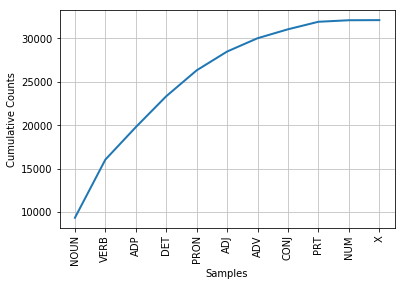

In [22]:
# Group words per tag:
tag_fd = nltk.FreqDist(tag for (word, tag) in tagged_lyrics)
tag_fd.most_common()
tag_fd.plot(cumulative=True)

In [23]:
test_set = tagged_lyrics[:10]
test_set

[('i', 'NOUN'),
 ('hector', 'NOUN'),
 ('storms', 'VERB'),
 ('the', 'DET'),
 ('wall', 'NOUN'),
 ('see', 'VERB'),
 ('my', 'PRON'),
 ('chariot', 'NOUN'),
 ('run', 'VERB'),
 ('to', 'PRT')]

In [24]:
# Map Manowar lyric corpus to generator
nouns = [t[0] for t in tagged_lyrics if t[1] == "NOUN"]
verbs = [t[0] for t in tagged_lyrics if t[1] == "VERB"]
adjectives = [t[0] for t in tagged_lyrics if t[1] == "ADJ"]
subjects = [t[0] for t in tagged_lyrics if t[1] == "PRON"]
adverbs = [t[0] for t in tagged_lyrics if t[1] == "ADV"]
connectors = [t[0] for t in tagged_lyrics if t[1] == "CONJ" or "ADP" or "DET" or "PRT"]

In [25]:
print("Nouns:")
nouns[:5]
print("Verbs:")
verbs[:5]
print("Adjectives:")
adjectives[:5]
print("Subjects:")
subjects[:5]
print("Adverbs:")
adverbs[:5]
print("Connectors:")
connectors[:5]

Nouns:


['i', 'hector', 'wall', 'chariot', 'ships']

Verbs:


['storms', 'see', 'run', "i'll", 'back']

Adjectives:


['shield', 'many', 'mine', 'sheep', 'like']

Subjects:


['my', 'your', 'you', 'you', 'me']

Adverbs:


['here', 'not', 'soon', 'not', 'not']

Connectors:


['i', 'hector', 'storms', 'the', 'wall']

#### Test the new generator

In [41]:
def manowar_lygen(nouns, verbs, adjectives, subjects, adverbs, connectors):
    
    # Insert title
    title_builder = True
    title = verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors)
    print('Track title: ' + title)
    print('\n')

    # Insert 1st Verse
    title_builder = False
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print('\n')

    # Insert Chorus
    print(title)
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print(title)
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print('\n')

    # Insert 2nd Verse
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print(verse_builder(nouns, verbs, adjectives, subjects, adverbs, connectors))
    print('\n')

    # Insert Outro:
    print(title)
    print(title)
    print(title)
    print(title)

In [42]:
manowar_lygen(nouns, verbs, adjectives, subjects, adverbs, connectors)

Track title: Had here alive ride


Chained where eyes away fire
We end fast join battle wait a odin world
Live well hot sky
Is how i'll words
Asgard forever gates just true wheels
Will just unrepentant revelation


Had here alive ride
Will still jive fight
Had here alive ride
Brave there thirst day


I guard draw take price
Carry before magic
Is all war
Rang much pipes


Had here alive ride
Had here alive ride
Had here alive ride
Had here alive ride


In [64]:
# Run 100 tracks:
for i in range(0,100):
    print("Track: " + str(i+1) + "\n")
    manowar_lygen(nouns, verbs, adjectives, subjects, adverbs, connectors)

Track: 1

Track title: Feel right revenge blood team


Me darkness when i club
We make altogether i'm hey road
He give where heads our blaze
Grandfather why die
You die then skin losers shall blood
See again time


Feel right revenge blood team
Fly i there's
Feel right revenge blood team
Will how burning steel tall forever


Heard soon righteous god not scripture
Entered never live
I always payments so rite will soldiers
Your knew always other bones on zeigt


Feel right revenge blood team
Feel right revenge blood team
Feel right revenge blood team
Feel right revenge blood team
Track: 2

Track title: There's long destruction into metal


Is not ones lord gonna i
Burning then final fight
Stand i life
Fight how don't i not brothers
Defy why defender
Scattered forever kingdom full tall friend


There's long destruction into metal
Their eighteen aside i
There's long destruction into metal
Them say really absolute horse


Fast i world together grand i
My look i thy god
Dwells why live shout